# Image Segmentation Using Clustering Methodology

## *Image Compression Is An Usefull Procedure To Eliminate Uncessary Details Which Would Increase The Complexity For Image Processing*

We are going to decrease the picture quality utilising the clustering algorithm.During clustering, there are several centroids of every cluster generated. This centroids delegate that specif cluster.

We will map only the centroids of the differents clusters and eleminate the extra pixels.

## Let's render the orginal image we will be working on.

## Importing Necessary Modules One By Through Out The Work Flow, for better understanding.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image=mpl.image.imread('GoldenGet.jpg')

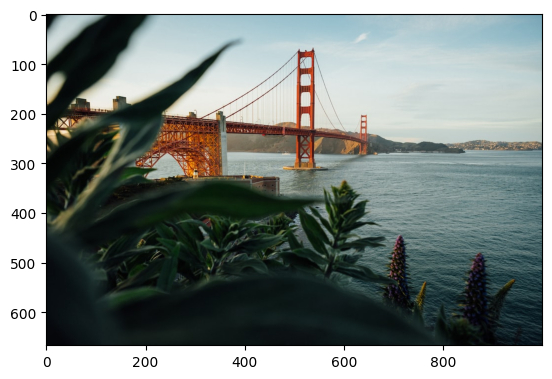

In [4]:
plt.imshow(image)

# The Image Has Been Rendered

In [7]:
image.shape

(667, 1000, 3)

## The Original Image Is Scaled 667 X 1000 grid, 3rd dimension resembling RGB colours.

## We need to converge Those 667 X 1000 grid in 1 dimensional datapoints for clustring.
## And the sencond dimension being the RGB classes.

In [8]:
converged_grid=image.reshape(-1,3)

In [9]:
converged_grid

array([[ 4,  2,  3],
       [ 4,  2,  3],
       [ 4,  4,  4],
       ...,
       [ 8, 19, 25],
       [ 7, 18, 24],
       [ 5, 16, 22]], dtype=uint8)

Data Points are ready to cluster.

# KMeans Algorithm Implementation For Clustering Of Converged Grid

We will import sklearn module for KMeans Algorithm.

In [12]:
from sklearn.cluster import KMeans

## Before We Implement The Model We Are Going To Evaluate The WCSS Score To Check The Optimal Number Of Clusters By The Help Of Elbow Curve Method.

In [14]:
wcss=[]
for i in range(1,11):
    k=KMeans(n_clusters=i)
    k.fit_predict(converged_grid)
    wcss.append(k.inertia_)

C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [15]:
wcss

[13216295431.905327,
 2254298525.1562834,
 942304776.1696576,
 622021760.0593082,
 509747836.2083402,
 411625647.5954847,
 327843833.9633412,
 282794034.41269076,
 253030112.1078647,
 225817873.46994126]

Text(0, 0.5, 'WCSS Score')

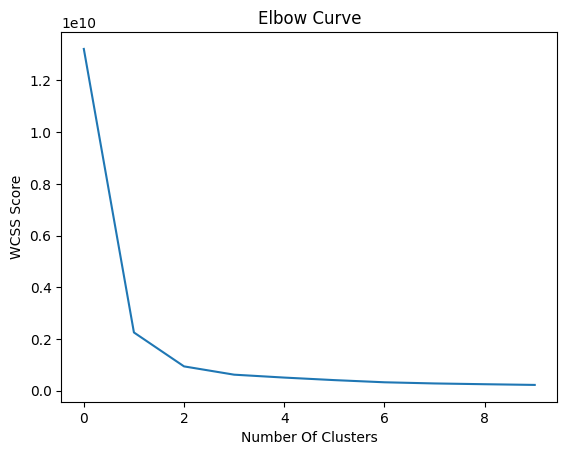

In [20]:
plt.title("Elbow Curve")
plt.plot(range(10),wcss)
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS Score")

The Elbow Curve Reveals 2 Clusters yeild the least WCSS Score. So let us implement the model with 2 clusters.

In [94]:
model=KMeans(n_clusters=2)
y_label=model.fit_predict(converged_grid)

C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
y_label

array([0, 0, 0, ..., 0, 0, 0])

# Let Us Map The Centers Of The Clusters On The Image 

In [96]:
segment_data_img=model.cluster_centers_[model.labels_]
segment=segment_data_img.reshape(image.shape)

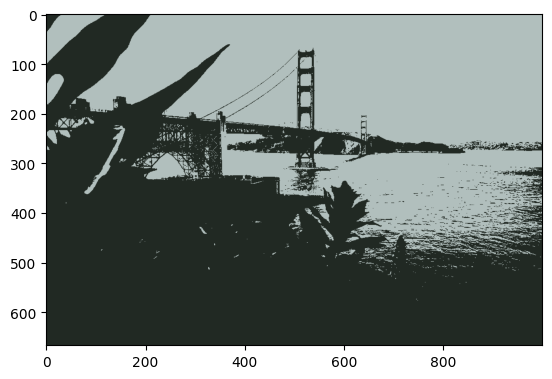

In [97]:
plt.imshow(segment/255) #divided by 255 to generate the pixel values since 2**8=256 

Higly Compressed Image Has Been Generated Above.

# Now We Will Develop A Function To Render Different Levels Of Compression The Orginal Image

In [127]:
def Compression(converged_grid,image):
    res=[]
    for i in range(1,11):#Numbers of Clusters
        k=KMeans(n_clusters=i)
        y_label=k.fit_predict(converged_grid)
        segments_img=k.cluster_centers_[k.labels_]
        segments=segments_img.reshape(image.shape)
        res.append(segments)
    return res
        
        
        

In [128]:
array=Compression(converged_grid,image)

C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shoham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [129]:
array

[array([[[ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         ...,
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261]],
 
        [[ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         ...,
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261]],
 
        [[ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         ...,
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261],
         [ 95.73988756, 106.09458171, 101.89678261]

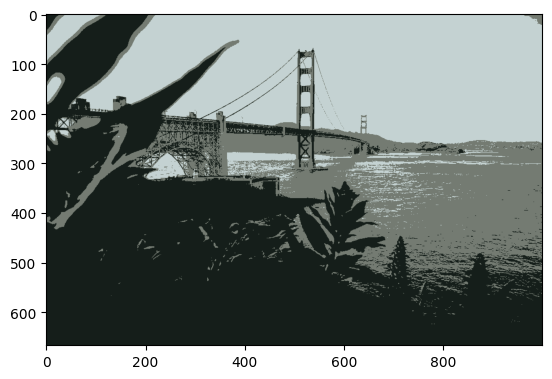

In [132]:
plt.imshow(array[2]/255)

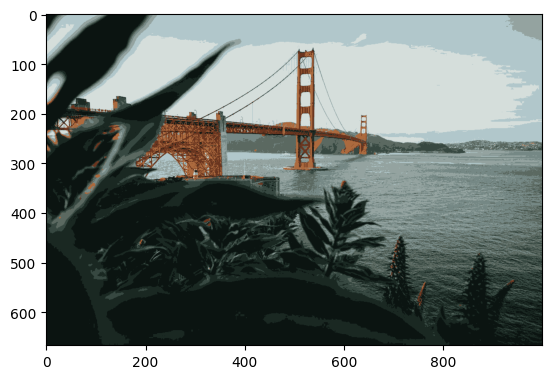

In [134]:
plt.imshow(array[9]/255)

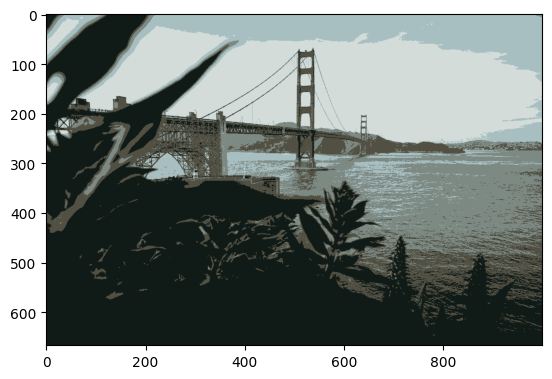

In [137]:
plt.imshow(array[4]/255)

# We Have Rendered Different Extend Of Compression Of Image Based On Number Of Clustering.

## *One Can Modify The Compression Function And Modify The Range Of Clustering To Unleash Different Extent Of Compression.*